# Trabajando con NumPy y Pandas: Prueba de evaluación

## 1. NumPy en una dimensión

In [230]:
# Imports
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as ss

SIZE=100000
SIZE_MED=50
SIZE_SMALL=10

### 1.1 Crea un array a de NumPy con números aleatorios siguiendo una distribución logística. 1.5 Dibuja las distribuciones (histogramas) de los tres arrays.

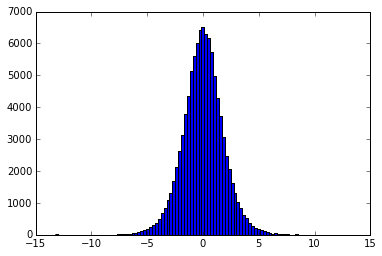

In [218]:
a = np.random.logistic(size=SIZE)

# Plot
count, bins, ignored = plt.hist(a, bins=100)

### 1.2 Crea un segundo array b multiplicando el anterior por una constante. 1.5 Dibuja las distribuciones (histogramas) de los tres arrays.

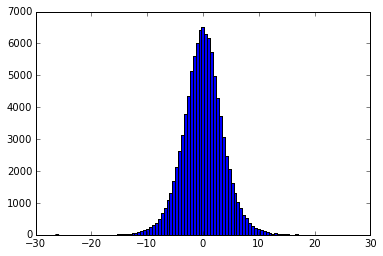

In [219]:
b = a * 2

# Plot
count, bins, ignored = plt.hist(b, bins=100)

### 1.3 Crea otro array adicional c del mismo tamaño con aleatorios de una distribución normal. 1.5 Dibuja las distribuciones (histogramas) de los tres arrays.

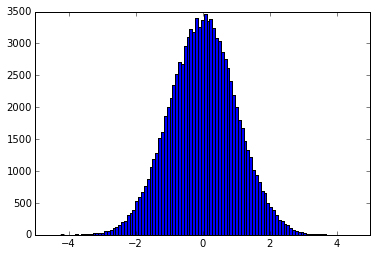

In [220]:
c = np.random.normal(size=SIZE)

# Plot
count, bins, ignored = plt.hist(c, bins=100)

### 1.4 Comprueba e interpreta un coeficiente de correlación de Pearson (biblioteca scipy.stats) entre los arrays creados, interpretando el resultado.

In [221]:
ss.pearsonr(a, b)

(1.0, 0.0)

- El resultado al comparar el array a y el b nos arroja (primer elemento de la dupla) una correlacion perfecta (1).

- Por otra parte (segundo elemento de la dupla), nos indica que el ajuste entre el array a y el b ofrece un error minimo (0).

- Esto es logico dado que b es n veces a, por lo que la relacion lineal entre los 2 arrays es máxima.

In [222]:
ss.pearsonr(a, c)

(0.00020350681336631514, 0.94868859467302635)

- El resultado al comparar el array a y el c nos arroja (primer elemento de la dupla) una correlacion muy pequeña (0.0010004731737205301).

- Por otra parte (segundo elemento de la dupla), nos indica que el ajuste entre el array a y el b ofrece un error elevado (0.75171901268565111).

- Esto tambien es razonable dado que los arrays han sido generados por distribuciones de naturaleza diferente, arrojando una relacion lineal baja.

### 1.6 Crea un nuevo array X con la mitad de los elementos de a y la mitad de los elementos de c. Asegúrate de que el array X es un nuevo array en memoria, no una vista sobre slices de los anteriores.

In [223]:
x = np.zeros(SIZE)
np.copyto(x[:(SIZE/2)], a[:(SIZE/2)])
np.copyto(x[(SIZE/2):], c[(SIZE/2):])

# Moficamos los arrays a y c
a_back, c_back = a[0], c[SIZE-1]
a[0]=1
c[SIZE-1]=1

# Comprobamos como el array x es diferente a los arrays a y c
print x[0]==a[0]
print x[SIZE-1]==c[SIZE-1]

# Restauramos valores originales
a[0] = a_back
c[SIZE-1] = c_back

False
False


- Con este sencillo codigo reejecutable podemos ver como se ha realizado una copia que no es una vista

### 1.7 Ordena el array anterior. Investiga si el array ordenado es una copia o una vista.

In [224]:
# Guardamos valor original de x
z = np.zeros(SIZE)
np.copyto(z, x)

# Ordenamos x y lo asignamos a y
y = np.sort (x)

# Comprobamos como el array y es distinto al array x
x = np.zeros(SIZE)
print y[0] == x[0]

# Restauramos valores originales
np.copyto(x, z)

False


- Con este sencillo codigo reejecutable podemos ver como se ha realizado una ordenacion que es una copia

### 1.8 Busca una función en las bibliotecas de NumPy que nos permita generar una permutación aleatoria de un array. Crea un array de enteros en un espacio lineal (linspace) y utiliza esa función para generar una permutación.

In [226]:
p = np.random.permutation((np.linspace(1, 10, num=SIZE_SMALL)).astype(int))
print p

[ 8  4  2  1 10  7  5  6  3  9]


### 1.9 Investiga las funciones loadtxt y savetxt y usalas para guardar el array anterior.

In [228]:
import StringIO as io   # StringIO se comporta como un objeto de tipo fichero

# Escritura a un objeto de tipo fichero
f = io.StringIO()
np.savetxt(f, np.atleast_2d(p), delimiter=',',fmt='%d',newline='')
print f.getvalue()

# Lectura de un objeto de tipo fichero
f = io.StringIO("8,4,2,1,10,7,5,6,3,9")
r = np.loadtxt(f, delimiter=',', dtype=int)
print r

8,4,2,1,10,7,5,6,3,9
[ 8  4  2  1 10  7  5  6  3  9]


### 1.10 Crea un array con números aleatorios enteros entre 1 y 10. Utilizando indexación con condiciones, extrae los elementos que son mayores que cinco en un nuevo array.

In [262]:
t = np.random.randint(1, 11, size=SIZE_MED)
u = t[(t > 5)]
print u

[ 7  6  6  7  6  8 10  6  7  8  6  7  8  8  9  7  7  7  7  8  6]


## 2. NumPy en dos dimensiones

### 2.1 Crea una matriz de números reales con NumPy con números aleatorios con la forma (6, 4).

In [251]:
m = np.random.random_sample((6, 4))
print m

[[ 0.55859999  0.3980893   0.30658179  0.64326676]
 [ 0.38652976  0.33144936  0.23805414  0.19630699]
 [ 0.90955699  0.87842483  0.42456771  0.3580491 ]
 [ 0.20693053  0.67950089  0.42698961  0.63302943]
 [ 0.36428586  0.61409621  0.1174907   0.18518256]
 [ 0.23423999  0.61993638  0.53219831  0.9514353 ]]


### 2.2 Establece a cero todos los elementos de la tercera columna.

In [252]:
m[:,2]=0
print m

[[ 0.55859999  0.3980893   0.          0.64326676]
 [ 0.38652976  0.33144936  0.          0.19630699]
 [ 0.90955699  0.87842483  0.          0.3580491 ]
 [ 0.20693053  0.67950089  0.          0.63302943]
 [ 0.36428586  0.61409621  0.          0.18518256]
 [ 0.23423999  0.61993638  0.          0.9514353 ]]


### 2.3 Crea un slice con la submatriz que cubre los elementos que están en las dos primeras columnas y las dos primeras filas (una matriz de 2x2). Crea una copia de ese slice en una nueva matriz. Comprueba que no es una vista, sino una copia nueva en memoria.

In [259]:
# Creamos un slice
s = np.zeros((2,2))
np.copyto(s, m[0:2,0:2])
print s

# Comprobamos que al modificar la matriz copiada no modificamos la original
s[0,0]=0
print s[0] == m[0]


[[ 0.55859999  0.3980893 ]
 [ 0.38652976  0.33144936]]
False
[[ 0.55859999  0.3980893 ]
 [ 0.38652976  0.33144936]]


- Con este sencillo codigo reejecutable podemos ver como se ha realizado una copia y no una vista

### 2.4 Crea un array Z de 50 elementos aleatorios entre 10 y 20 y redimensiónalo para que sea una matriz de 10 filas y cinco columnas.

In [265]:
z = np.random.randint(10, 21, size=SIZE_MED)
print z

z = z.reshape((10,5))
print z

[16 17 11 18 11 15 10 20 19 15 19 10 17 11 13 16 11 11 17 14 14 15 10 10 15
 18 10 19 16 14 15 13 16 14 13 12 10 17 16 14 19 16 19 12 11 14 20 19 19 20]
[[16 17 11 18 11]
 [15 10 20 19 15]
 [19 10 17 11 13]
 [16 11 11 17 14]
 [14 15 10 10 15]
 [18 10 19 16 14]
 [15 13 16 14 13]
 [12 10 17 16 14]
 [19 16 19 12 11]
 [14 20 19 19 20]]


### 2.5 Extrae a un array los elementos de la matriz Z que están entre 15 y 17, y pon esos elementos a cero en Z

In [270]:
# Generamos una matriz booleana con los valores que cumplen la condicion
sel = (z >= 15) & (z <= 17) 

# Aplicamos la matriz booleana a la matriz original para extraer los valores que cumplen la condicion
a = z[sel == True]
print a

# Ponemos a cero los elementos indicados por la matriz booleana en la matriz original
z[sel == True] = 0
print z

[16 17 15 15 17 16 17 15 15 16 15 16 17 16 16]
[[ 0  0 11 18 11]
 [ 0 10 20 19  0]
 [19 10  0 11 13]
 [ 0 11 11  0 14]
 [14  0 10 10  0]
 [18 10 19  0 14]
 [ 0 13  0 14 13]
 [12 10  0  0 14]
 [19  0 19 12 11]
 [14 20 19 19 20]]


### 2.6 Obtén la media por filas y por columnas de los elementos del array Z

In [273]:
# Obtenemos la media por filas
print z.sum(axis=1)

# obtenemos la media por columnas
print z.sum(axis=0)

[40 49 53 36 34 61 40 36 61 92]
[ 96  84 109 103 110]


### 2.7 Obtén la suma acumulada (tienes que buscar la función adecuada de NumPy) de los elementos de Z y explica los resultados

In [280]:
print z.cumsum()

[  0   0  11  29  40  40  50  70  89  89 108 118 118 129 142 142 153 164
 164 178 192 192 202 212 212 230 240 259 259 273 273 286 286 300 313 325
 335 335 335 349 368 368 387 399 410 424 444 463 482 502]


- Podemos ver como se devuelve un array con la suma de todos los elementos anteriores mas el elemento actual para cada posicion
- La matriz se recorre de izquierda a derecha y de arriba a abajo

## 3. Pandas

## 3.1 Crea un DataFrame nuevo que tenga valores nulos (NaN). Utiliza fillna() para reemplazar esos valores por otros no nulos. Investiga si esa función hace una copia o modifica el DataFrame original.

In [3]:
import pandas as pd
import numpy as np
# Inicializamos nuestro Dataframe desde un diccionario
d = {
    'A':np.random.randint(1, 11, size=5),    
    'B':np.random.randint(1, 11, size=5),
    'C':np.random.randint(1, 11, size=5)
}
df = pd.DataFrame(d)

# Introducimos algunos valores ausentes NAs o NaNs
df[df<4] = np.nan
print df

# Reemplazamos los valores ausentes por el valor 0
print df.fillna(value=0)

# El Dataframe original permanece inmutable. Tenemos la opcion 'inplace' para que la funcion 'fillna' modifique el original
print df.fillna(value=0)==df

    A   B   C
0 NaN   4 NaN
1   9   6   8
2   8 NaN NaN
3 NaN   5   7
4 NaN NaN NaN
   A  B  C
0  0  4  0
1  9  6  8
2  8  0  0
3  0  5  7
4  0  0  0
       A      B      C
0  False   True  False
1   True   True   True
2   True  False  False
3  False   True   True
4  False  False  False


### 3.2 Crea un DataFrame vacío y añade campos y datos de ejemplo para llevar una agenda de teléfonos, que incluya la ciudad en la que vive cada contacto.

In [4]:
agenda = pd.DataFrame()
agenda["Numero"] = ["656 447 008","646 133 100","628 410 477","626 453 789"]
agenda['Nombre'] = ['Javier','Alberto', 'Julia', 'David']
agenda['Apellido'] = ['Lopez','Ramos', 'Moya', 'Balade']
agenda["Ciudad"] = ["Madrid", "Madrid", "Pontevedra","Barcelona"]

print agenda

        Numero   Nombre Apellido      Ciudad
0  656 447 008   Javier    Lopez      Madrid
1  646 133 100  Alberto    Ramos      Madrid
2  628 410 477    Julia     Moya  Pontevedra
3  626 453 789    David   Balade   Barcelona


### 3.3 Ordena tu agenda por apellido.

In [5]:
print agenda.sort(['Apellido'], ascending=[1])

        Numero   Nombre Apellido      Ciudad
3  626 453 789    David   Balade   Barcelona
0  656 447 008   Javier    Lopez      Madrid
2  628 410 477    Julia     Moya  Pontevedra
1  646 133 100  Alberto    Ramos      Madrid


### 3.4 Agrupa los contactos por ciudad, y cuenta cuántos contactos tienes en cada ciudad.

In [12]:
print agenda.groupby(['Ciudad'])['Ciudad'].count()

Ciudad
Barcelona     1
Madrid        2
Pontevedra    1
Name: Ciudad, dtype: int64


### 3.5 Obtén los contactos de tu agenda que viven en Barcelona.

In [13]:
print agenda.loc[agenda['Ciudad'] == 'Barcelona']

        Numero Nombre Apellido     Ciudad
3  626 453 789  David   Balade  Barcelona


### 3.6 Crea un DataFrame nuevo para llevar tu calendario. Lo que queremos guardar son citas: fecha, hora, persona con la que has quedado, motivo y lugar. Rellénalo con datos (para que tengan sentido los siguientes ejercicios), algunos de ellos que vengan de la creación del DataFrame a partir de un diccionario de Python.

In [14]:
# Inicializamos nuestro Dataframe desde un diccionario
c = {
    'Fecha':['2015-03-01','2015-06-11','2015-08-10','2015-08-10','2015-08-11'],
    'Hora':['12:00','12:00','15:00','16:00', '16:00']
}
calendario = pd.DataFrame(c)

# Añadimos el resto de columnas
calendario['Nombre'] = ['Javier','Alberto', 'Julia', 'David', 'Alberto']
calendario['Apellido'] = ['Lopez','Ramos', 'Moya', 'Balade', 'Ramos']
calendario['Motivo'] = ["Negocios","Negocios","Ocio","Ocio", "Negocios"]
calendario['Lugar'] = ["Madrid","Madrid","Sevilla","Toledo", "Toledo"]

print calendario

        Fecha   Hora   Nombre Apellido    Motivo    Lugar
0  2015-03-01  12:00   Javier    Lopez  Negocios   Madrid
1  2015-06-11  12:00  Alberto    Ramos  Negocios   Madrid
2  2015-08-10  15:00    Julia     Moya      Ocio  Sevilla
3  2015-08-10  16:00    David   Balade      Ocio   Toledo
4  2015-08-11  16:00  Alberto    Ramos  Negocios   Toledo


### 3.7 Haz que el DataFrame tenga como índice la fecha.

In [15]:
calendario = calendario.set_index(["Fecha"])
print calendario

             Hora   Nombre Apellido    Motivo    Lugar
Fecha                                                 
2015-03-01  12:00   Javier    Lopez  Negocios   Madrid
2015-06-11  12:00  Alberto    Ramos  Negocios   Madrid
2015-08-10  15:00    Julia     Moya      Ocio  Sevilla
2015-08-10  16:00    David   Balade      Ocio   Toledo
2015-08-11  16:00  Alberto    Ramos  Negocios   Toledo


### 3.8 Obtén las citas de los meses de junio y agosto.

In [16]:
print calendario[((calendario.index > '2015-06-01') & (calendario.index < '2015-06-30')) | ((calendario.index > '2015-08-01') & (calendario.index < '2015-08-31'))]

             Hora   Nombre Apellido    Motivo    Lugar
Fecha                                                 
2015-06-11  12:00  Alberto    Ramos  Negocios   Madrid
2015-08-10  15:00    Julia     Moya      Ocio  Sevilla
2015-08-10  16:00    David   Balade      Ocio   Toledo
2015-08-11  16:00  Alberto    Ramos  Negocios   Toledo


### 3.9 Crea una función en Python que devuelva una lista de las citas para el día que le pases como parámetro.

In [17]:
def citasHoy( str ):
       return calendario.ix[str]

print citasHoy('2015-08-10')

             Hora Nombre Apellido Motivo    Lugar
Fecha                                            
2015-08-10  15:00  Julia     Moya   Ocio  Sevilla
2015-08-10  16:00  David   Balade   Ocio   Toledo


### 3.10 Elimina todas las citas de marzo del DataFrame.

In [22]:
calendario = calendario[(calendario.index < '2015-03-01') | (calendario.index > '2015-03-31')]
print calendario

             Hora   Nombre Apellido    Motivo    Lugar
Fecha                                                 
2015-06-11  12:00  Alberto    Ramos  Negocios   Madrid
2015-08-10  15:00    Julia     Moya      Ocio  Sevilla
2015-08-10  16:00    David   Balade      Ocio   Toledo
2015-08-11  16:00  Alberto    Ramos  Negocios   Toledo


### 3.11 Obtén una tabla con los contactos y el número de citas que tienes en la agenda con cada uno de ellos.

In [25]:
citas = calendario.reset_index().merge(agenda, how="left").set_index('Fecha')
print citas.groupby(['Nombre','Apellido'])['Numero'].count()

Nombre   Apellido
Alberto  Ramos       2
David    Balade      1
Julia    Moya        1
Name: Numero, dtype: int64


- Trabajo realizado por: Alfonso Campos